# PHYS 309 Assignment 1

### Getting started

<ul>
    <li>If you do not already have the <a href="https://www.anaconda.com/products/distribution">Anaconda <tt>python</tt> distribution</a>, click the link to install the individual, free version</li>
    <li>Download this notebook to your own computer, open with <tt>Jupyter</tt> notebook or lab, and complete the missing code. See the <a href="https://docs.jupyter.org/en/latest/start/index.html"><tt>Jupyter</tt> documentation</a> for help.</li>
</ul>

<strong>Instead of putting in the values of physical constants such as $c$ and $\epsilon_0$ by hand, use SI values pre-programmed into [scipy.constants](https://docs.scipy.org/doc/scipy/reference/constants.html).
For example, $\mu_0$ is <tt>constants.mu_0</tt>.

### Set up <tt>python</tt> environment

In [2]:
import numpy as np
import matplotlib.pyplot as plt

 # Contains physical constants defined in SI units (default) as well as other systems
from scipy import constants

# Make easily readable plots with large axis labels
plt.rcParams["font.family"] = "DejaVu Sans"


### Questions


Recall that the speed of light in vacuum is
\begin{equation}
c = \frac{1}{\sqrt{\epsilon_0 \mu_0}}, \; \; \; \; \; (1)
\end{equation}
where $\epsilon_0 = 8.85 \times 10^{-12}$ F/m (Farads per meter)$^{*}$ is the electric permittivity of free space and $\mu_0 = 1.26 \times 10^{-6}$ N/A$^2$ (Newtons per Ampere$^2$)$^{**}$ is the magnetic permeability of free space. The electric field created by a point charge $q$ is
\begin{equation}
E = \frac{1}{4 \pi \epsilon_0} \frac{q}{r^2}. \; \; \; \; (2)
\end{equation}

Suppose a charged particle is moving at some fraction $f$ of the speed of light in vacuum ($v_q = f c; \; 0 < f < 1$) as seen in reference frame $K$. Reference frame $K^{\prime}$ is co-moving with the point charge, so that $\frac{dx^{\prime}}{dt^{\prime}} = v^{\prime}_q = 0$ in frame $K^{\prime}$. To make the math easier, put $q$ at the origin of $K^{\prime}$.

To understand Einstein's motivation for developing the special theory of relativity, make the <strong>incorrect, erroneous, and wrong</strong> assumption that the Galilean velocity transformation holds true for all values of $f$:
\begin{equation}
\frac{dx^{\prime}}{dt^{\prime}} = \frac{dx}{dt} - v_q \; \; \; (3)
\end{equation}

<ol>
    <li>Assume the charged particle is an electron. Using Equation 2, calculate and plot the electric field as a function of distance $r^{\prime}$ from $q$ in frame $K^{\prime}$. Choose an x-axis range that makes sense to you and <strong>label both axes with correct units.</strong></li>
</ol>

In [3]:
#constants
electronCharge =constants.elementary_charge
epsilon=constants.epsilon_0
mu=constants.mu_0
c=constants.speed_of_light
pi=constants.pi

<ipython-input-4-40885abf4e39>:2: RuntimeWarning: divide by zero encountered in divide
  return electronCharge/(4*pi*epsilon*r**2)


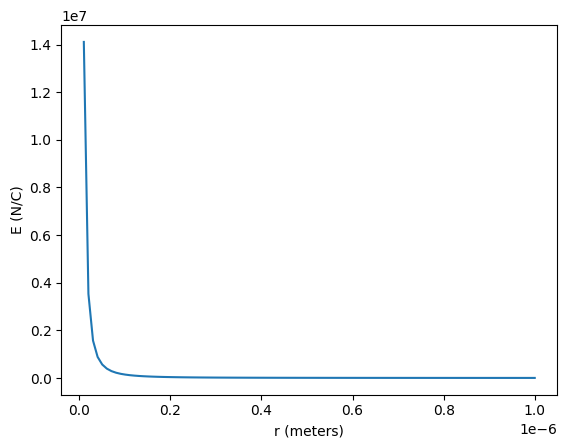

In [4]:

def equation2(r):
  return electronCharge/(4*pi*epsilon*r**2)
xs = np.linspace(0,.000001,100)
ys=equation2(xs)
plt.plot(xs,ys)
plt.xlabel("r (meters)")
plt.ylabel("E (N/C)")
plt.show()

<ol start=2>
    <li>The Galilean velocity transformation suggests that objects can "catch up" with light, so that light in a vacuum appears to be going slower than the value of $c$ from Equation (1). Make a plot of $c^{\prime}$, the <strong>incorrect</strong> speed of light in frame $K^{\prime}$ according to the Galilean transformation, as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

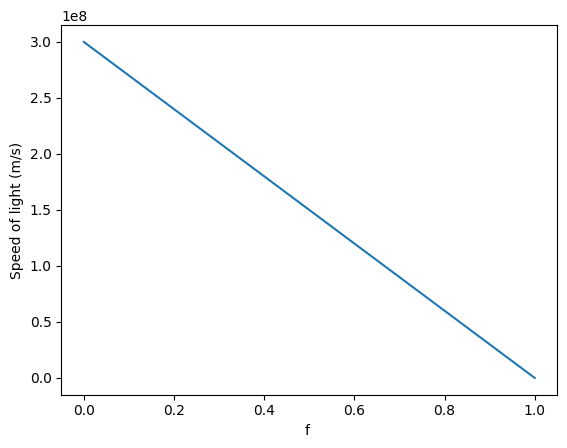

In [5]:
# Plot here
def equation3(f):
  return c*(1-f)
xs = np.linspace(0,1,1000)
ys=equation3(xs)
plt.plot(xs,ys)
plt.xlabel("f ")
plt.ylabel("Speed of light (m/s)")
plt.show()

<ol start=3>
    <li>In frame $K^{\prime}$, something has to give: either Equation (1) is no longer true, or the values of $\epsilon_0$ and/or $\mu_0$ have to change. Suppose Equation (1) is still true and $\mu_0 = \mu_0^{\prime}$. Make a plot with two vertically stacked subplots. The top subplot should show $\epsilon_0^{\prime}$ as a function of $f$, while the bottom plot should show the electric field $E^{\prime} = \frac{1}{4 \pi \epsilon_0^{\prime}} \frac{q}{{r^{\prime}}^2}$ at $r^{\prime} = 1 \mu \mathrm{m} = 10^{-6}$ m as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

<ipython-input-15-9b2e1dbaca54>:4: RuntimeWarning: divide by zero encountered in divide
  return 1/(((c*(1-f))**2)*mu)


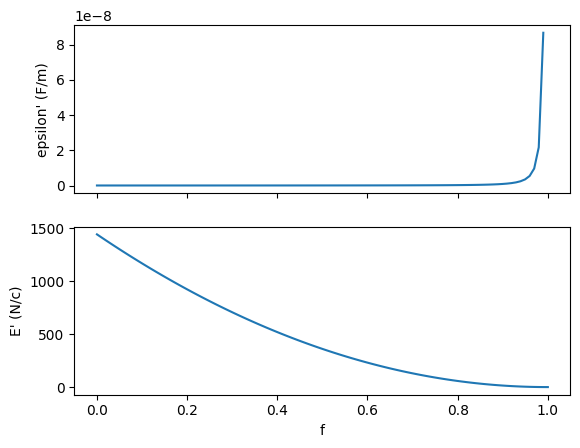

In [15]:
# Plot here

def epsilonprimefunction(f):
  return 1/(((c*(1-f))**2)*mu)
def func2(f):
  return electronCharge*(10**12)/((4*pi*epsilonprimefunction(f)))
xaxis=np.linspace(0,1,100)
epsilonPrime=(epsilonprimefunction(xaxis))
Eprime=func2(xaxis)
fig, graphs = plt.subplots(2, sharex=True)
graphs[0].plot(xaxis,epsilonPrime)
graphs[0].set_ylabel("epsilon' (F/m)")
graphs[1].plot(xaxis,Eprime)
graphs[1].set_xlabel("f")
graphs[1].set_ylabel("E' (N/c)")
graphs[1].set_xlabel("f")
plt.show()

<ol start=4>
    <li>Now assume $f = 0.5$. In the same plot window, plot $E^{\prime}(r^{\prime})$ given by Equation 2 (same curve as in Problem 1) <em>and</em> $E^{\prime}(r^{\prime})$ calculated as in Problem 3, where $\epsilon_0^{\prime}$ is a function of $f$. Do you notice a problem?</li>
</ol>

<ipython-input-4-40885abf4e39>:2: RuntimeWarning: divide by zero encountered in divide
  return electronCharge/(4*pi*epsilon*r**2)


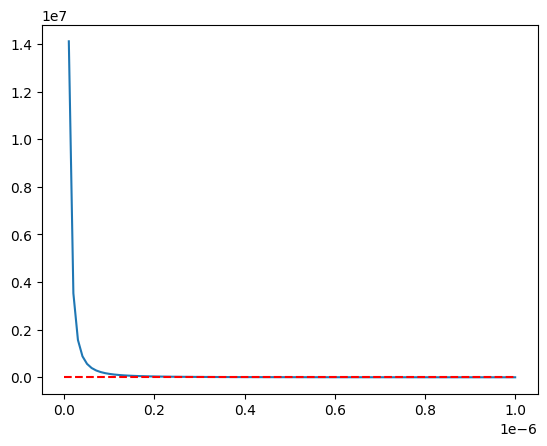

In [7]:
# Plot here


xs = np.linspace(0, 1e-6, 100)
ys=equation2(xs)

epsilonprime = 1/(((c*(.5))**2)*mu)

Eprime = 1/(4*pi*epsilonprime)*electronCharge/(10**(-12))



x = np.linspace(0, 1e-6, 100)
y_constant = np.full_like(xs, Eprime)

plt.plot(xs, ys)
plt.plot(x, y_constant, linestyle="--", color="r")
plt.xlabel("f")
plt.ylabel("E' (N/c) and epsilon naught (F/m)")

plt.show()

<ol start=5>
    <li>To resolve the issues revealed by the plot from Problem 4, you may suggest setting $\epsilon_0^{\prime} = \epsilon_0$ and allowing $\mu_0^{\prime}$ to vary with $f$. Let's explore that solution. To accompany the point charge in problems 1-4, add a current loop that's also at rest in frame $K^{\prime}$. Recall that the magnitude of the magnetic field strength at the center of the loop in frame $K$ is $B = \frac{\mu_0 I}{2R}$, where $I$ is the current and $R$ is the radius of the loop. Suppose $I = 1$ A and $R = 1$ m. Assume $E^{\prime} = E$, $B^{\prime} = B$, and $c^{\prime}$ depends on $f$ as in problem 2. Plot $\mu_0$ as a function of $f$.</li>
</ol>

<ipython-input-8-e775367b2eb4>:4: RuntimeWarning: divide by zero encountered in divide
  return 1/(((c*(1-f))**2)*epsilon)


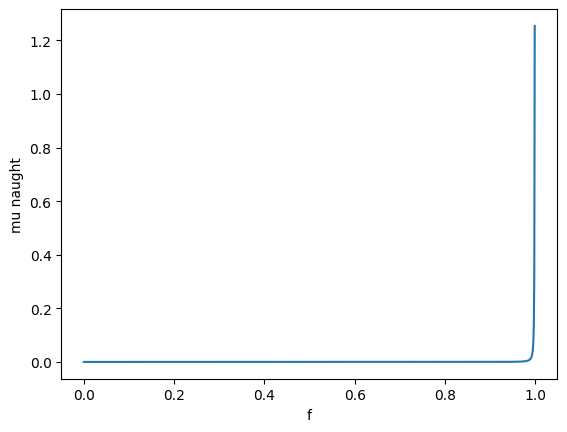

In [8]:
# Plot here
xs = np.linspace(0,1,1000)
def muprime(f):
  return 1/(((c*(1-f))**2)*epsilon)
Bprime = muprime(xs)/2 #2 in this case because I and R are both 1
Bnaught = Bprime
munaught = 2*Bnaught
plt.plot(xs,munaught)
plt.xlabel("f")
plt.ylabel("mu naught (H/m)")
plt.show()



#there is a solid chance this is wrong, I think this question was asking about how mu naught being dependent on f makes no sense




<ol start=6>
<li>If we calculate $c^{\prime}$ using the Galilean transformation in Equation 3, is there any value of $f$ for which $E^{\prime} = E$ <strong>and</strong> $B^{\prime} = B$? Make a graph to illustrate your answer.</li>
</ol>

<ipython-input-17-33ad52431e31>:3: RuntimeWarning: divide by zero encountered in divide
  return (c)/f


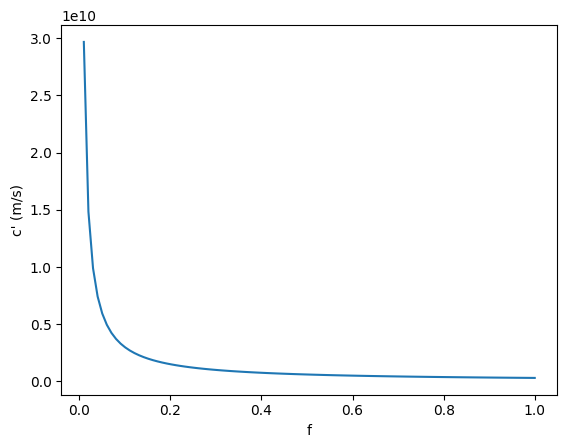

In [17]:
# Plot here
def cprime(f):
  return (c)/f

xs = np.linspace(0,1,100)
ys=cprime(xs)
plt.plot(xs,ys)
plt.xlabel("f")
plt.ylabel("c' (m/s)")
plt.show()

#i am also not sure if this one is right, I am somewhat confident on everything except these last two, it appears that E' = E at all times according to this graph?

Conceptual questions about the conflict between the Galilean velocity transformation and E&M are in the written homework assignment.

$^{*}$Farad = Coulomb/Volt: Farad is the unit of capacitance, which measures the amount of charge necessary to increase the electric potential of a system by 1 Volt. Farads/meter measure how much capacitance you get per meter of free space between yourself and a charged particle.

$^{**}$Newtons/Ampere$^2$ = Newtons/(Coulombs/second)$^2$. $\mu_0$ measures how effective inductance is at creating magnetic force in free space.